# Mean-Field AOA - Additional Material for the Review Process

https://arxiv.org/abs/2303.00329

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
import sys
sys.path.append('../src')
from meanfieldaoa import *

## Convergence in $p$

In [3]:
# number of spins
N = 200

In [4]:
# container to collect data at different p
# do not reset unless intended
data_dict = {}

In [5]:
# create random SK instance
np.random.seed(1)
J = np.random.normal(0, 1, size=(N, N)) / np.sqrt(N)
J = np.triu(J, k=1)
J = J + J.transpose()

In [6]:
τ = 0.5
for p in [500, 1000, 2000, 5000]:

    # for this schedule, see Appendix A of https://arxiv.org/pdf/1907.02359.pdf
    γ = τ * (np.arange(1, p + 1) - 1/2) / p
    β = τ * (1 - np.arange(1, p + 1) / p)
    β[p-1] = τ / (4 * p)

    # fix final spin (i.e. leave it out)
    S = np.array([[1., 0., 0.] for _ in range(N - 1)])
    data = np.array([S for _ in range(p+1)])

    # run one step at a time
    for k in range(p):
        S = evolve(S, J, np.array([β[k]]), np.array([γ[k]]))
        data[k + 1] = S

    data_dict[p] = data

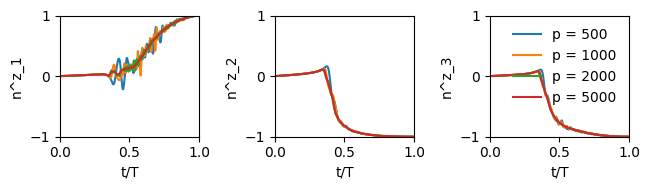

In [7]:
# plot x, y, and z of a number of spins 
num_plts = 3
plt.figure(figsize=(num_plts * 2.2, 2))

for key, val in data_dict.items():
    times = np.linspace(0, 1, key+1)
    for n in range(num_plts):
        plt.subplot(1, num_plts, n+1)
        plt.plot(times, (val.T[2][n]), label="p = " + str(key))
        plt.xlim(0, 1)
        plt.ylim(-1, 1)
        plt.xlabel("t/T")
        plt.ylabel("n^z_" + str(n+1))
        plt.yticks([-1, 0., 1])

plt.legend(frameon=False)
plt.tight_layout()